In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from warnings import filterwarnings
filterwarnings('ignore')


# PCR Model

In [2]:
import pandas as pd
import numpy as np
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna() # Eksik Gozlemleri Sildik
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


### Veri Seti Hakkinda

* Veri Seti Basketbol Oyuncularinin Bazi Bilgilerini Barindiran Bir Veri Setidir

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [5]:
# Veri Setimiz Buyuk Oldugu Icin Hizli On Isleme Islemlerini Ele Almamiz Gerekiyor ( Ornegin Kategorik Degiskenleri Dami Degisken Formatina Donusturmemiz Gerekiyor )

In [6]:
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']]) # One Hot Encoding Donusumu Yaptik ----->> Fakat Goruldugu Uzere Dami Degisken Tuzagina Dusme Soz Konusudur ---->> Dolayisi Ile Yapacak
# Oldugumuz Is Buradaki Ikinci Olarak Tekrar Eden Degiskenleri Bu Veri Setinden Cikarmak Olucak

dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [7]:
y = df["Salary"] # Bagimli Degiskeni Kayit Ettik

In [8]:
X_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64") # Yukarida Bahsettigim Durumu Ortadan Kaldirdim ----->> Simdi Bu Veri Setinin Icinden Bagimli Degiskeni Ve Bu
# Kategotik Degiskenlerin Ilk Hallerini Cikardim

In [9]:
X_.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0


In [10]:
X = pd.concat([X_, dms[["League_N", "Division_W","NewLeague_N"]]], axis = 1) # Birlestirme Islemi Yaptik ---->> Su Anda Bagimsiz Degiskenlerimizi Olmasi Gerektigi Gibi Hepsini Modellemeye
# Hazir Hale Getirdik
X.head()

# X : Bagimsiz Degiskenlerimizi Ifade Ediyor Ve Bir Data_Frame

# y : Bagimli Degiskenimizi Ifade Ediyor Ve Oda "Salary" Degiskenidir

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42) # Veri Setimizi Bolduk

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [12]:
# Oncelikle Verinin Olceklendirilmesi Ve Bilesenlerin Olusturulmasi Islemini Ele Alicaz ( Import Etme Islemini Yapiyoruz Bu Yapiyi Kullanabilmek Icin )

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA() # Normalde Bilesen Sayisi Argumani Var ---->> Biz Girmiyoruz ---->> Boylece Degisken Sayisi Kadar Bilesen Olusma Islemi Olusmus Olucak

In [13]:
# X_reduced ----->> Indirgenmis X Anlaminda Kullaniyoruz
# scale ----->> Olceklendirme Islemi Yapmaya Yariyor ( Yukarida Import Ettik )

X_reduced_train = pca.fit_transform(scale(X_train))

In [14]:
# Su Anda Elimizde Degisken Sayisi Kadar Bilesen Olusturulmus Fakat Aralarindaki Baglanti Problemi Ortadan Kalkmis Indirgenmis Bir Veri Seti Var

# Yapacak Oldugumuz Islem Bu Veri Seti Uzerinden Bazi Incelemeler Yapalim Dogrulayalim Ondan Sonra Bi Deneme Yapalim

# Birde Yukaridanki Code De Sadece Fit Fonksiyonu Da Kullanilabilir Bu Durumda Model Nesnesi Olusur, Biz Transform Ile Olusturduk Ki Hem X'e Gore Model Olusacak Hemde Boyut Indirgeme Islemi Yapilacak -->
# -->> Sadece Transform Fonksiyonu Ise X Boyut Indirgeme Islemi Yapar Yani Aslinda Bu Fonksiyonla Biz Boylece Iki Isi Birden Yapmis Oluyoruz Seklinde Dusunebiliriz

In [15]:
X_reduced_train[0:1,:] # Birinci Goslem Ve Tum Bilesenleri Su Anda Gozlemliyoruz

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

In [16]:
X_reduced_train[0:1,0:1] # Birinci Bilesen Uzerinde Birinci Goslemi Gorduk

array([[-2.49569913]])

In [17]:
X_reduced_train[0:1,0:2] # Ilk Iki Bilesende Birinci Gozlemi Gormus Olduk

array([[-2.49569913, -0.3377624 ]])

In [18]:
# Varyans'i Gormek Istedigimizi Dusunelim ---->> Ornegin Ilk 10 Bilesen Ve Bu Bilesenlerce Kumulatif Olarak Aciklanan Varyans'i Gormek Istedigimizi Dusunelim

# cumsum: Kumulatif sum Demek


np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

# Yorum; Birinci Bilesenin Veri Setinde Bulunan Toplam Degiskenligin Yani Varyans'in %38 Ini Acikladigi Gozukuyor ---->> Devam Edelim ----->> Ikinci Bilesenin Birinci Bilesen Ile Acikladigi
# Varyans Ise %60 Civarinda ----->> Bakin Burada Bilesen Sayisi Arttikca Original Veri Setinin Icindeki Varyansi Aciklama Oranlarinin Arttigi Gozlemleniyor ---->> Veri Setimizde Ornegin 15-20 Tane
# Degisken Vardi Fakat Biz Bakin 10 Degisken Burda Gorsellestirdik ( Gosterdik ) Bu 10 Degiskende Daha 10. Degiskene Geldiginde Zaten Veri Setinin Icerisindeki Degiskenligin %97 Sini Acikliyoruz
# Dolayisi Ile Mesela Soyle 5 Bilesene Baksak ( Asagida )

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

In [19]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5] # Buralarda % 84'unu Aciklayabilir Bir Hale Gelmisiz Dolayisi Ile Burada Temel Bilesen Analizinin Temel Mantigi Buydu --->>
# ---->> Veri Setini Daha Az Sayida Bilesene Indirgemekti Mesela 19 Degiskeni Aldik Burada ( Degisken Sayisini Hatirlamiyorum 20 De Olabilir ) Istersek 19 Degiskene 19 Bilesenle, Istersek 5 Bilesenle,
# Istersek 8-10 Bilesenle Temsil Edebiliyoruz ---->> Her Kosulda Sectigimiz Bilesen Sayisi Ile Bu Bilesen Sayisinin Ustune Modeli Kurdugumuzda Model Kurma Islemini Gerceklestirmis Oluyoruz

array([38.18, 59.88, 70.88, 78.88, 84.18])

In [20]:
lm = LinearRegression()

In [21]:
# X_reduced_train : Indirgenmis Train Seti'ni Burada Biriyoruz

pcr_model = lm.fit(X_reduced_train, y_train) # Su Anda Tum Bilesenleri Kullanarak Modeli "fit" Etme Islemi Gerceklestirdik

In [22]:
pcr_model.intercept_ # Sabit Burada Gelmis Oldu

543.4834416243655

In [23]:
pcr_model.coef_ # Katsayilari Istedigimizi Ifade Ediyoruz ( 19 Tane Katsayi'da Gelmis Oldu )

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

In [24]:
# Ne Yapmis Olduk; Oncelikle Veri Setini 19 Tane Degisken Var Iken Boyutunu Indirgedik, Indirgedigimiz Boyut Uzerinden Dogrusal Reglesyon Fit Ettik Ve Bu Sekilde Degerlere Eristik

## Tahmin

* Bu Bolumde Kurmus Oldugumuz Model Ile Tahmin Islemi Gerceklestiricez

In [25]:
y_pred = pcr_model.predict(X_reduced_train)

In [26]:
y_pred[0:5] # y_pred Icerisinden Bazi Gozlemleri Inceleyelim ---->> Bakin Cikan Sonuclar Tahmin Edilen Degerler ---->> "Egitim Seti Icerisindeki" Tahmin Ettigim Degerler

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [27]:
# Simdi Train Setimiz Icin Hatamizi Hesaplayalim

np.sqrt(mean_squared_error(y_train, y_pred)) # rmse Hatasi ---->> 

289.3292825564976

In [28]:
df["Salary"].mean() # Maas Ortalamasi Budur ---->> ( Cok Cok Iyi Bir Tahmin Mi Degil Mi Tartisilir )

535.9258821292775

In [29]:
r2_score(y_train, y_pred) # R Kare Degeri ( Bu Fonksiyonu Daha Once Import Etmistik )

0.5770075250410179

In [30]:
# Simdi Birde Test Hatamizi Inceleyelim --->> Valide Edilmis Hatayi Degil Train Test Uzerinden Gidiyorum --->> Bilgilerini Paylastim Degerlendirmelerimizi Biz Train Test Uzerinden Yapicaz ---->>
# ---->> Model Tuning Islemlerinde Validasyon Yontemlerini Ele Aliyor Olucaz

In [31]:
# Simdi Test Hatasi Icin Benzer Bir Islem Yapiyor Olucaz

In [32]:
pca2 = PCA() # Nesne Olusturduk

In [33]:
X_reduced_test = pca2.fit_transform(scale(X_test)) # Indirgeme Islemini Gerceklestiriyoruz

In [34]:
# Simdi Hatayi Hesaplamak Icin Bu Indirgemis Oldugum ( X_reduced_test ) Test Veri Seti Uzerinden y_pred'leri Hesaplayalim

In [35]:
y_pred = pcr_model.predict(X_reduced_test) # Soyle Tahmin Degerlerini Aldik ----->> Yani Ne Yapmis Oldum ---->> Egitim Seti Uzerinden Kurmus Oldugum Modeli Kullanarak Test Setinin X Degerlerini Modele
# Yerlestirip Y'nin Tahmin Edilen Degerlerini ( y Sapka --->> y_pred Olarak Dusunulebilir ) Elde Etmis Oldum

In [36]:
# Simdi Test Seti Icin Ayni Hata Hesaplama Islemini Gerceklestirelim

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Burada Bisi Farkettim ---->> Bidaha Bu Codeyi Calistirirsam Deger Degisiyor Nedeni Ne Olabilir ( Tehlikeli Olabilir ) ( Dikkat Et !!! )

405.15753641499634

## Model Tuning

In [38]:
# Butun Bilesenler Ile Kurulan Modelin Test Hatasina Bir Daha Bakalim ( Hatirlatma )

# X_reduced_train : Egitim Seti
# X_reduced_test : Test Seti

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)
y_pred = pcr_model.predict(X_reduced_test)
print(np.sqrt(mean_squared_error(y_test, y_pred)))

405.15753641499634


In [39]:
# 1 Bilesenli Hali

# Peki Biz Bunu 1 Bilesen Ile Model Kurmus Oldugumuzu Dusunelim Ve Nasil Test Hatalari Almis Olabilecegimizi Gozlemleyelim

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:1], y_train) # Egitim Setinin 1. Bilesenine Kadar Aldi ( Onemli Hatirlatma : Egitim Setinin Gozlemi Ile Bi Altta Bulunan Test Seti Boyutu Ayni Olmak Zorunda ) -->
# Eger Ayni Olmazsa Boyut Hatalarina Gidicez
y_pred = pcr_model.predict(X_reduced_test[:,0:1]) # Tahmin Yaparken Ki Test Seti Ayni Ayarda Olmak Zorunda
print(np.sqrt(mean_squared_error(y_test, y_pred)))

392.38935589493457


In [40]:
# 2 Bilesenli Hali

# Peki Biz Bunu 2 Bilesen Ile Model Kurmus Oldugumuzu Dusunelim Ve Nasil Test Hatalari Almis Olabilecegimizi Gozlemleyelim

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:2], y_train) # Egitim Setinin 2. Bilesenine Kadar Aldi ( Onemli Hatirlatma : Egitim Setinin Gozlemi Ile Bi Altta Bulunan Test Seti Boyutu Ayni Olmak Zorunda ) -->
# Eger Ayni Olmazsa Boyut Hatalarina Gidicez
y_pred = pcr_model.predict(X_reduced_test[:,0:2]) # Tahmin Yaparken Ki Test Seti Ayni Ayarda Olmak Zorunda
print(np.sqrt(mean_squared_error(y_test, y_pred)))

396.38761247967653


In [41]:
# Bilesen Sayisi Daha Fazla Yapalim Mesela 10 Yapalim

# Peki Biz Bunu 10 Bilesen Ile Model Kurmus Oldugumuzu Dusunelim Ve Nasil Test Hatalari Almis Olabilecegimizi Gozlemleyelim

lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train) # Egitim Setinin 10. Bilesenine Kadar Aldi ( Onemli Hatirlatma : Egitim Setinin Gozlemi Ile Bi Altta Bulunan Test Seti Boyutu Ayni Olmak Zorunda ) -->
# Eger Ayni Olmazsa Boyut Hatalarina Gidicez
y_pred = pcr_model.predict(X_reduced_test[:,0:10]) # Tahmin Yaparken Ki Test Seti Ayni Ayarda Olmak Zorunda
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [42]:
# Simdi Biz Burada Bilesen Sayilari Ile Oynadigimizda ( Teker Teker ) Dusuk Sonuclara Ulasabiliyoruz Ama Biz Teker Teker Deneme Yapmak Istemiyoruz Ne Gerek Var? ---->> Bir Yapi Olusturup En Optimum --->>
# --->> Sonucu ( Bilesen Sayimizi Belirleme Islemi Yapicaz ) Bulucaz

In [43]:
from sklearn import model_selection

In [44]:
# 10 Katli Cross Validation Yapilandirmasi Yapmis Olduk


# shuffle : Gruplara Ayrilmadan Once Verilerin Karistirilip Karistirilmayacagi Bilgisini Tasiyor


cv_10 = model_selection.KFold(n_splits = 10, # 10 Katli Yapacagim Bilgisini Veriyorum
                             shuffle = True,
                             random_state = 1)

In [45]:
lm = LinearRegression()

In [46]:
RMSE = []

In [47]:
# !! Soo Important !!

# Simdi Her Bir Bilesen Sayisi Icin Olusturulacak Modeller Ile Cross Validation'a Gore Train Hatasi Hesaplanacak Ve Bir Kaydetme Islemi Gerceklesecek Ve Bunun Sonunda Biz Bu Sonuclari Gorsellestirip
# Degerlendirip ( Buna "Bulut Force" Yontemi Denir ) Bu PCR Icin En Uygun Bilesen Sayisinin Ne Olduguna Karar Vermis Olucaz

In [48]:
# Bu Islemi Bir Kerede Yapan Kutuphane Yok Bu Yuzden For Dongusune Aldik

for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

In [49]:
# !! Soo Important !!

# Yukaridaki Islem Her Bir Bilesen Sayisi Icin Gidicek Model Kurucak, Her Bir Bilesen Icin K Katli Cross Validation Uygulayip Buradaki Hata Degerlerini Elde Edip Daha Sonra Bize Hangi Bilesen Sayisinin
# Daha Az Hata Olusturdugu Bilgisini Sunmus Olucak

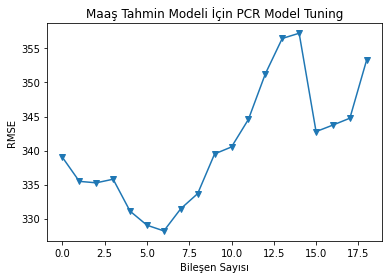

In [50]:
# 2 Yukarida Yapilan Islemin Sonuclarini Gozlemleyelim

plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

# Yorum; Optimum Bilesen Sayisinin Kac Olmasi Gerektigini Cross Validation Yontemi Ve Train Setini Kullanarak  ( Onemli Bir Bilgi Bunu Train Seti Uzerinden Yapiyoruz ) Cross Validation Yontemi Ile
# Dogrulamayi Ve Bilesen Sayisi Secmeyi Burda Kullanmis Oluyoruz Ve Sonrasinda Bilesene Sayisini Belirledik ( Su Anda Biliyoruz Kİ Bilesen Sayisi 6 ) ( Bitti Mi ? ) ( Bitmedi ) ---->>
# ----->> Optimum Bilesen Sayisi Ile Final Modelini Olusturucaz

In [51]:
lm = LinearRegression()

In [52]:
# En Optimum Bilesen Sayisi 6 Bulduk Bu Yuzden 6 Uzerinden Yapiyoruz

pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [53]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [54]:
print(np.sqrt(mean_squared_error(y_train, y_pred))) # Burada Tahmin Edilen Degerler Ile Train Icerisindeki Gercek Degerler Icin Bir Egitim Hatamiza Bakalim ( 308 Cikti ) 

308.8265983094501


In [55]:
# Simdi Bu Islemin ( Yukaridaki Islemin ) Aynisini Test Seti Icin Gerceklestirelim

In [56]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6]) # Test Setimizi Girdik, Bunun Uzerinden Uzerinden Test Setine Iliskin Y Tahmin Degerleri Olusacak

In [57]:
print(np.sqrt(mean_squared_error(y_test, y_pred))) # Buradaya y_test Dedigimizde Test Setinin Y Degerlerine Erismis Olucaz

393.11987000962233


# Genel Olarak Ne - Yaptik Ne Yapiyoruz

In [58]:
# Genelde Beklentimiz Modelin Tune Edilmeden Onceki Ortaya Koydugu Test Hatasi Ile Tune Edildikten Sonra Bizim Hesapladigimiz Test Hatasi Karsilastirildiginda Bizim Hesapladigimiz Ve Tune Edilmis
# Modelin Test Hatasinin Daha Assagida Cikmasini Bekleriz ( Genel Beklenti Bu Yonde Olmalidir, Yoksa Niye Bosu Bosuna Tune Islemi Yaptik Dimi ( Evet ) )

# Fakat Eger Elimizdeki Test Ve Train Degerlendirme Islemlerinde Valide Edilmis Score'ler Uzerinden Bu Islemi Yapiyorsak Bu Durumda Da Beklenti Daha Saglikli Olucaktir


# Simdi Toparlicak Olursak; Oncelikle Her Zaman Ilkel Bir Test Hatasi Ve Train Hatasi Hesaplicaz, Bu Elde Ettigimiz Test Hatasi Ve Train Hatasini Daha Dogru Degerlendirebilmenin Yolu Cross Validation
# Yontemi Ile Incelemek Demistik, Iste Elde Ettigimiz Ilk Train Hatasi Ve Test Hatasini Cross Validation Yontemi Ile Bir Daha Goz Onunde Bulundurdugumuzda Elimize "Daha Dogru" Hatalar Gelicek
# 2. Basamaga Gecelim; ( Model Tuning Bolumu ) Tune Ettigimiz Bir Model Demek, Model Icin Uygun Olan Hiper Parametre Degerini Buldugumuz Anlamina Gelir. Bir Model Icin Uygun Hiper Parametre Degerini
# Bulmak Icin Cross Validation Yontemini Kullaniyoruz Yani Amacimiz Cross Validation Yontemini O Modelin En Iyi Parametre Degerini Bulmak Icin Kullanmak Oluyor Dolayisi Ile Bu Parameter Degerini
# Bulduktan Sonra Artik ( Aslinda Bakarsaniz ) Train Seti Ile Bir Iliskimiz Yok Yani Onu Kullandik ( Ne Icin Kullandik; En Iyi Prametre Degerini Bulmak Icin Kullandik ) ( Tamam Bu Cepte )
# Simdi Odaklanalim Final Modeline Daha Sonra Bu Bulmus Oldugumuz Final Parametre Degeri Ile Final Modelini Kurmus Oluyoruz Bu Modeli Kurduktan Sonra Onumuzde Yine Train Hatasi Ve Test Hatasi
# Degerlendirme Soz Konusu ( Dimi : Evet Cunku Yeniden Model Kurduk, Geriye Donmus Olduk Aslinda Model Kurma Basamagina Donmus Olduk ) Simdi Yine Modeli Kurarken En Optimum Parametreyi Bu Sefer Modele
# Gosteriyoruz Ve Train Seti Uzerinden Modelimizi Kuruyoruz Ilerleyecek Olursak Artik Model Kurulduktan Sonra Bu Modelin Yine Train Hatasi Ile Ilgilenmiyoruz Cunku Biz Bu Model Icin Optimum Olduguna
# Kanaat Getirdigimiz Parametreyi Zaten Bulup Bunu Yerlestirmis Olduk Simdi Odagimizda Yine Test Seti Olmus Olucak Son Asamada Iste Burada Yine Test Setini Degerlendirirken Yine Cross Validation Yontemi
# Ile Degerlendirebiliriz Yada Sinama Seti Olarak Disarida Biraktigimiz Set Ya Bu Ve Bunu Butun Model Karsilastirmalarinda da Esit Olarak Birakicaz Ya Dolayisi Ile Bunun Icin Cross Validation Uygulamadan
# Da Direk Test Hatasina Gidebiliriz Ozetle; Butun Bolumlerde ( Ilerki Seviyelerde ) Bundan Sonra Soyle Ilerlemis Olucaz Biz Bi Model Tuning Islemi Yaparak Modellerin Parametre Degerlerini Bulucaz Daha
# Sonra Bu Parametre Degerleri Ile Final Modelleri Olusturucaz Ve Bu Final Modelleri Uzerinden De Son Test Hatalarini Hesaplicaz Bunu Sinama Seti Yaklasimi Ile Hesaplar Sekilde Hesaplicaz Ki Butun
# Modeller Ile Bu Sekilde Degerlendirme Imkani Bulmus Olalim. Bu Sekilde Elde Edicegimiz Deger Ise Bizim Artik En Son Tune Edilmis Modelimizin Degeri Olmus Olucak ( Yani Optimum Ulasmaya Calistigimiz 
# Test Hatamiz Olmus Olucak ) Burda Modeli Tune Etme Islemini Cross Validation Araciligi Ile Yapmis Olaraktan Parametremizi Bulup Bunla Son Modeli Kurdugumuzda Iste Onun Uzerinden Artik Son Elde
# Ettigimiz Test Seti Hatasi Bizim Final Test Hatamiz Olmus Olucak

# PLS
## Model

In [59]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [61]:
pls_model = PLSRegression().fit(X_train, y_train) # Modeli Kurduk

In [62]:
pls_model.coef_ # Modelin Katsayilarina Erisiyoruz ( Su Anda Modelin Degisken Sayisi Kadar Elimizde Katsayisi Var )

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

In [63]:
# Iki Ustteki Ile Ayni Sadece Bilesen Sayisini Degistiriyoruz ( Goslemleme Yapmak Icin Ne Olucak Diye Yani )

pls_model = PLSRegression(n_components = 2).fit(X_train, y_train) # Modeli Kurduk

In [64]:
pls_model.coef_ # Gorulecegi Uzere 6 Yazdigimizda Yine Ayni Sayida Katsayi Geldi ( Biz Bilesen Sayisini Ayarlayarak Bazi Problemlerden Kurtuluyoruz )

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

## Tahmin

In [65]:
pls_model # Modelimiz Bu Sekildeydi

PLSRegression()

In [66]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [67]:
pls_model.predict(X_train)[0:10] # Tahmin Yapmak Icin Kullaniyoruz ( Biz 2 Bilesenli Model Kurdugumuz Halde Cok Fazla Var)( Numpy Arrayi Oldugu Icin [0:10] Kullandik )

# Bu Elde Ettigimiz Bizim Tahmin Degerlerimiz ( Y Tahmin Degerlerini ( "Salary" ) ) Degerlerini Bize Gosteriyor

# Simdi Bunun Uzerinden Train Hatasini Ve Test Hatasini Validasyon Olaylarina Hic Girmeden Degerlendiricez

array([[344.91941493],
       [848.87070769],
       [692.93622642],
       [185.56577984],
       [435.49196077],
       [987.49530026],
       [120.63097106],
       [289.9263406 ],
       [663.41886918],
       [817.90486641]])

In [68]:
y_pred = pls_model.predict(X_train) # Tahmin Edilen Degerler

In [69]:
# Egitim Hatamiz Icin

np.sqrt(mean_squared_error(y_train, y_pred)) # Train Hatamiz 310 Seklinde Hesaplanmis

310.1167593109696

In [70]:
# R Kare Degerini De Hesaplayalim

r2_score(y_train, y_pred)

0.5140424486535481

#### Bilgilendirme Var Burada ( Alt Kisimda )

In [71]:
# Train Hatamizi Gozlemledik Yukarida Simdi "Test Hatamizi" Gozlemleyelim

y_pred = pls_model.predict(X_test) # Modelimizi Egitim Seti Uzerinden Kurduk ( Tahmin Edicek ) ( Neyi Tahmin Edicek ) X Test Icerisinde Var Olan Bagimsiz Degiskenlerin
# Degerlerini Alicak Bu Modelde Hesaplamis Oldugumuz Katsayilarin Yerine Koyacak Ve Her Bir Gozlem Birimi Degeri Icin Bir y Tahmin Degeri Hesaplamis Olucak

In [72]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Karsilastirma Icin "y_test" Ifadesini Kullanicaz ----->> Test Hatamizi 398 Olarak Gozlemliyoruz

398.09956327448526

* Beklenildigi Uzere Ust Taraftaki Modeldeki Train Hatamizi Ve Test Hatamizi Elde Ettik, Beklenildigi Gibi Test Hatasi ( 398 ) Train Hatasindan ( 310 ) Yuksek Cikti
* Bu Genelde Boyle Olur Demistik

## Model Tuning

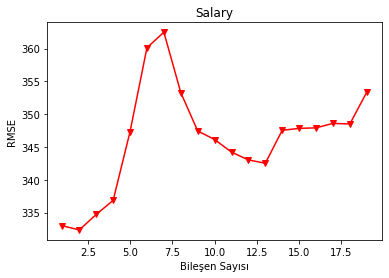

In [73]:
#CV --->> Cross Validation Yontemi ----->> 10 Katli 
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = [] # Hata Kareler Ortalamasi Karekok Degerlerini Saklayacak Bos Bir Liste ( Array ) Olusturduk


# Bu Listenin Icerisine Her Bir Modelin Her Bir Farkli Bilesen Sayisinca Hesaplanacak Olan Ve Cross Validation Yontemi Ile Hesaplanacak Olan Score'ler Uzerinden Hangi
# Modelin Daha Iyi Oldugu Bilgisine Asagidaki Grafikteki Gibi Erismis Olucaz ( Gorulecegi Uzere 2 Bilesen Sayisin Bana Optimum Degeri Verecek Oldugunu Goruyorum )


for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [74]:
# Simdi 2 Bilesene Gore Modelimizi Tekrar Bi Fit Edelim ( Final Model Olusturuyoruz Aslinda Su Anda )

pls_model = PLSRegression(n_components = 2).fit(X_train, y_train) # 2 Bilesenli Final Modelimizi Kurduk

In [75]:
# Final Model Icin Bi Test Hatasi Hesaplama Islemini Gerceklestirelim

y_pred = pls_model.predict(X_test) # Tahmin Edilen Degerler Elimizde

In [76]:
# Hata Kareler Ortalamasini Gozlemleyelim

np.sqrt(mean_squared_error(y_test, y_pred)) # Test Hatamiz 398 Cikti ( Ulasilabilecek En Optimum Hata Degeri Budur ( Bilgilendirme ) )

398.09956327448526

# Ridge Regresyon
## Model

In [77]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [78]:
from sklearn.linear_model import Ridge

In [79]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train) # ( Nereyi Fit Edicem ) X_train Uzerinden Fit Edicem, (Bagimli Degiskenim Hangisi ) y_train

In [80]:
ridge_model # Ciktida Gozuken alpha Degeri Aslinda Bizim Bu Konuda Gordugumuz Lambda Degeridir Aslinda

Ridge(alpha=0.1)

In [81]:
ridge_model.coef_ # Modelin Katsayilari

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [82]:
# Gozlemlemek Icin ( Assagida Kullaniyoruz ) Cesitli Lambda Degerleri ( Array Olusturuyoruz )

10**np.linspace(10,-2,100)*0.5 # Simdi Bu Lambda Degerlerine Gore Katsayilarin Nasil Degistigini Gozlemlicez

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

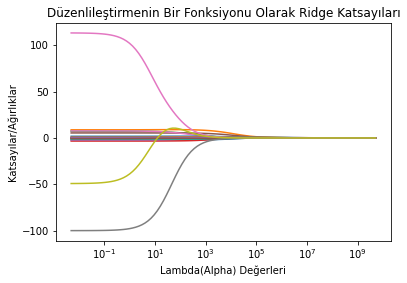

In [83]:
# Farkli Lambda Degerlerine Karsilik Katsayilari Gozlemleme Islemi Gerceklestirelim ( Dongu Ile Yapicaz )

lambdalar = 10**np.linspace(10,-2,100)*0.5 # Bir Array Olusturuyoruz ( Burada Kullaniyoruz )

ridge_model = Ridge() # Model Nesnesi Olusturduk
katsayilar = [] # Katsayilar Isimli Array Olusturduk

for i in lambdalar:
    ridge_model.set_params(alpha = i) # Her Iterasyonda Verilen Lambda Degerlerini Parametre Olarak Alicak ( Her Seferinde Alpha Degerlerini Degistirecek )
    ridge_model.fit(X_train, y_train) # Model Fit Edilecek
    katsayilar.append(ridge_model.coef_) # Katsayilar Arrayini Modelin Katsayilar'i Ile Doldurmus Oldu
    

# Her Labda Degerinin 19 Tane Katsayisi Olucak ( Her Iterasyonda 19 Deger Olusmus Olucak)
    
# Grafik Ile Ilgili Ayarlamalar
ax = plt.gca() # Genel Yapi Ile Ilgili Ayarlamalar
ax.plot(lambdalar, katsayilar)
ax.set_xscale('log') # x Ekseni Olceklendirme Ile Ilgili Ayarlamalar

# Eksen Isimlendirmeleri
plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

# lambda Degerleri Arttikca Katsayilar/Agirliklar 0'a Yaklasiyor Ama Hic Bir Zaman 0 Olmuyor ( Bu Islemi Gozlemlemek Icin Yaptik )( Hangi Lambda Degerinin Iyi Oldugunu Assagida Model Tuning De Yapiyoruz)

## Tahmin

* ( Bilgilendirme ) Artik Train Hatalari Ile Ilgilenmiyoruz Oncelikle Test Hatasini Ve Model Test Hatasini Tune Edilmis Modelin Test Hatasini Beraber Degerlendirip Buna Gore Ilerlicez ( Ogrendigimiz Icin )

In [84]:
# Kurmus Oldugumuz Modelle Tahmini Nasil Gerceklestiriyoruz ( Model Ismi + .predict + ( Bagimsiz Degisken Degerleri Anlaminda Neyi Kullanmasini Istiyorsak Onu Ifade Ediyoruz ) )

y_pred = ridge_model.predict(X_test) # Tahmin Edilen Degerler

In [85]:
# Test Hatamiza Eriselim

# y_test : Gercek Degerler
# y_pred : Tahmin Edilen Degerler

np.sqrt(mean_squared_error(y_test, y_pred))

357.05179222828446

## Model Tuning

In [86]:
# Hedefimiz Optimum Lambda Degerlerine Ulasmak Olucak

In [87]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

In [88]:
lambdalar[0:5]

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09])

In [89]:
# Model Nesnesi Olusturduk

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring = "neg_mean_squared_error",
                   normalize = True)

In [90]:
# Modeli Fit Ettik ( Train Seti Uzerinden Optimum Parametreleri Bulma Islemini Gerceklestiricez )

ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        normalize=True, scoring='neg_mean_squared_error')

In [91]:
ridge_cv.alpha_ # Optimum Lambda Degeri ( Cok Kolay Bir Sekilde Basit Bir Fonksiyon Sayesinde Yuklu Bir Code Yazmaktan Kurtulduk )

0.7599555414764666

In [92]:
# Elde Ettigimiz Lambda Degeri ıle Final Modeli Olusturalim ( ridge_tuned : Tune Edilmis Model Anlaminda Kullandik )

ridge_tuned = Ridge(alpha = ridge_cv.alpha_, 
                   normalize = True).fit(X_train,y_train)

In [93]:
# np.sqrt(mean_squared_error(y_test, y_pred)) Bu Sekilde Yazmak yerine Daha Fakli Bir Sekilde Yazdik ( y_pred Ifadesine Farkli Bir Sekilde Ulastik )

np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

386.68264297564144

# Lasso Regresyon

#### Ridge Regresyon Ile Arasindaki Fark;
* Ridge Regresyon Lambda Degerlerini 0 Yapmaz
* Lasso Regresyon Lambda Degerlerini 0 Yapar

* lambdanın 0 Oldugu Yer EKK'dir

## Model

In [94]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [95]:
from sklearn.linear_model import Lasso

In [96]:
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)

In [97]:
lasso_model

Lasso(alpha=0.1)

In [98]:
lasso_model.coef_ # Modelin Katsayilari

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

Text(0, 0.5, 'weights')

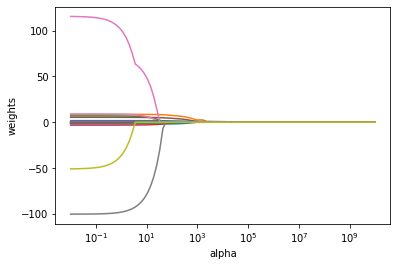

In [99]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

# Grafikte Degerler 0 Degeri Oluyor

## Tahmin 

In [100]:
lasso_model.predict(X_test) # Her Bir Bagimli Degiskenin Degerleri Gosteriliyor

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [101]:
y_pred = lasso_model.predict(X_test)

In [102]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Test Hatasi

356.7545270148771

## Model Tuning

In [103]:
from sklearn.linear_model import LassoCV

In [104]:
lasso_cv_model = LassoCV(alphas = None, 
                         cv = 10, 
                         max_iter = 10000, 
                         normalize = True)

In [105]:
lasso_cv_model.fit(X_train,y_train) # Model Kurulmus Oldu

LassoCV(cv=10, max_iter=10000, normalize=True)

In [106]:
lasso_cv_model.alpha_ # Optimum Alpha Degeri

0.39406126432470073

In [107]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_) # Final Model

In [108]:
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=0.39406126432470073)

In [109]:
y_pred = lasso_tuned.predict(X_test)

In [110]:
np.sqrt(mean_squared_error(y_test, y_pred)) # Final Modelin Test Hatasini Inceliyoruz

356.5226376958366

### Lasso Regresyon, Ridge Regresyon'a Gore Neredeyse 30 Birimlik Bir Fark Oldugu Gozlenmektedir

# ElasticNet Regresyonu

In [111]:
hit = pd.read_csv("../input/hitterscsv/Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)




In [112]:
from sklearn.linear_model import ElasticNet

In [113]:
enet_model = ElasticNet().fit(X_train, y_train)

In [114]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [115]:
enet_model.intercept_ # Sabite Eristik

-6.465955602112331

## Tahmin

In [116]:
enet_model

ElasticNet()

In [117]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [118]:
y_pred = enet_model.predict(X_test)

In [119]:
np.sqrt(mean_squared_error(y_test, y_pred))

357.1676548181246

In [120]:
r2_score(y_test, y_pred)

0.41070222469326867

## Model Tuning

In [121]:
from sklearn.linear_model import ElasticNetCV

In [122]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [123]:
enet_cv_model.alpha_

5230.7647364798695

In [124]:
enet_cv_model

ElasticNetCV(cv=10, random_state=0)

In [125]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [126]:
y_pred = enet_tuned.predict(X_test)

In [127]:
np.sqrt(mean_squared_error(y_test, y_pred))

394.15280563218795

### ( Bilgilendirme ) Elimizdeki Bu Veri Seti Icin Lasso Modeli Daha Iyi Sonuc Vermistir